In [34]:
## ANN chiller group model
import pandas as pd

# Load the data
data = pd.read_csv('chillerGroupResults.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()


(9316, 16)
(9006, 16)


,Time,chillersFMU.mCenChi,chillersFMU.mAbsChi,chillersFMU.TWetBul,chillersFMU.Qchp,chillersFMU.mChiWat,chillersFMU.pChi,chillersFMU.pFan,chillersFMU.TchiSup,chillersFMU.TchiAbsSup,chillersFMU.QchiAbs,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.absChiOn,chillersFMU.yVal,chillersFMU.pPum
0,0.0,0.0,0.0,264.37,1000000.00,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
1,3600.0,0.0,0.0,264.37,1000456.60,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
2,7200.0,0.0,0.0,263.23,1000913.25,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
3,10800.0,0.0,0.0,262.86,1001369.90,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
4,14400.0,0.0,0.0,261.82,1001826.50,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0


In [35]:
# Outlier clipping
inputs = ['chillersFMU.TWetBul', 'chillersFMU.mChiWat', 'chillersFMU.Qchp', 'chillersFMU.absChiOn'] ##States and actions
outputs = ['chillersFMU.pPumAbs', 'chillersFMU.pFanAbs', 'chillersFMU.pPum', 'chillersFMU.pFan', 
           'chillersFMU.yVal', 'chillersFMU.TchiAbsSup', 'chillersFMU.TchiSup', 'chillersFMU.pChi', 
           'chillersFMU.QchiAbs','chillersFMU.mAbsChi','chillersFMU.mCenChi' ] 


# 1st output, 2nd input predicts 2nd output
# 2nd output, 3rd input predicts 3rd output

columns = inputs + outputs

mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

,Time,chillersFMU.mCenChi,chillersFMU.mAbsChi,chillersFMU.TWetBul,chillersFMU.Qchp,chillersFMU.mChiWat,chillersFMU.pChi,chillersFMU.pFan,chillersFMU.TchiSup,chillersFMU.TchiAbsSup,chillersFMU.QchiAbs,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.absChiOn,chillersFMU.yVal,chillersFMU.pPum
0,0.0,0.0,0.0,264.37,1000000.00,0.0,0.0,559.5375,287.375,281.15,0.0,0.0,0.0,0,0.0,0.0
1,3600.0,0.0,0.0,264.37,1000456.60,0.0,0.0,559.5375,287.375,281.15,0.0,0.0,0.0,0,0.0,0.0
2,7200.0,0.0,0.0,263.23,1000913.25,0.0,0.0,559.5375,287.375,281.15,0.0,0.0,0.0,0,0.0,0.0
3,10800.0,0.0,0.0,262.86,1001369.90,0.0,0.0,559.5375,287.375,281.15,0.0,0.0,0.0,0,0.0,0.0
4,14400.0,0.0,0.0,261.82,1001826.50,0.0,0.0,559.5375,287.375,281.15,0.0,0.0,0.0,0,0.0,0.0


In [36]:
# Define inputs and outputs
##ANN outputs

# Create input and output datasets
X = pd.concat([data[inputs].iloc[1:].reset_index(drop = True), data[outputs].iloc[:-1]], axis=1)
y = data[outputs].iloc[1:]

X.index = data.Time[1:]
y.index = data.Time[1:]
# X = X.iloc[1:]
# X = pd.concat([X, y.iloc[:-1]], axis=1, ignore_index=True)

In [37]:
X.head()

,chillersFMU.TWetBul,chillersFMU.mChiWat,chillersFMU.Qchp,chillersFMU.absChiOn,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.pPum,chillersFMU.pFan,chillersFMU.yVal,chillersFMU.TchiAbsSup,chillersFMU.TchiSup,chillersFMU.pChi,chillersFMU.QchiAbs,chillersFMU.mAbsChi,chillersFMU.mCenChi
Time,,,,,,,,,,,,,,,
3600.0,264.37,0.0,1000456.60,0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
7200.0,263.23,0.0,1000913.25,0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
10800.0,262.86,0.0,1001369.90,0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
14400.0,261.82,0.0,1001826.50,0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
18000.0,262.16,0.0,1002283.10,0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0


In [38]:
y.head()

,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.pPum,chillersFMU.pFan,chillersFMU.yVal,chillersFMU.TchiAbsSup,chillersFMU.TchiSup,chillersFMU.pChi,chillersFMU.QchiAbs,chillersFMU.mAbsChi,chillersFMU.mCenChi
Time,,,,,,,,,,,
3600.0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
7200.0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
10800.0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
14400.0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0
18000.0,0.0,0.0,0.0,559.5375,0.0,281.15,287.375,0.0,0.0,0.0,0.0


In [39]:
X.shape

(9005, 15)

In [40]:
y.shape

(9005, 11)

In [41]:
index = pd.Series(X.index)
index[(index >= 2*30*86400) & (index<=3*30*86400)]

1440    5184000.0
1441    5187600.0
1442    5191200.0
1443    5194800.0
1444    5198400.0
          ...    
2161    7761600.0
2162    7765200.0
2163    7768800.0
2164    7772400.0
2165    7776000.0
Name: Time, Length: 726, dtype: float64

In [42]:
month = 30*86400
import numpy as np
def split_data_20_10(X, y):
    X_train, X_test, y_train, y_test = [], [], [], []
    index = pd.Series(X.index)
    for i in range(0, int(X.index[-1])//month):

        index_filter = index[(index >= i*30*86400) & (index<=(i+1)*30*86400)]
        
        X_train.append(X.loc[index_filter[:int(len(index_filter)*0.7)]])
        y_train.append(y.loc[index_filter[:int(len(index_filter)*0.7)]])
        X_test.append(X.loc[index_filter[int(len(index_filter)*0.7):]])
        y_test.append(y.loc[index_filter[int(len(index_filter)*0.7):]])

    return np.vstack(X_train), np.vstack(X_test), np.vstack(y_train), np.vstack(y_test)

In [43]:
X_train, X_test, y_train, y_test = split_data_20_10(X, y)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



In [12]:
X_train.shape

(6220, 15)

In [13]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(len(outputs)),  # Output layer with the same number of neurons as target features
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mae']) 


In [ ]:
history = model.fit(X_train, y_train, epochs=800, batch_size=256, validation_split=0.2)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2606 - mae: 0.4020 - val_loss: 0.1494 - val_mae: 0.3008
Epoch 2/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1110 - mae: 0.2595 - val_loss: 0.0987 - val_mae: 0.2628
Epoch 3/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0813 - mae: 0.2322 - val_loss: 0.0830 - val_mae: 0.2271
Epoch 4/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0574 - mae: 0.1898 - val_loss: 0.0626 - val_mae: 0.1926
Epoch 5/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0362 - mae: 0.1460 - val_loss: 0.0448 - val_mae: 0.1566
Epoch 6/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 - mae: 0.1118 - val_loss: 0.0386 - val_mae: 0.1408
Epoch 7/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - mae: 0.0916 - val_loss: 0.0364 - val_mae: 0.1341
Epoch 8/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - mae: 0.0802 - val_loss: 0.0368 - val_mae: 0.1344
Epoch 9/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

In [14]:
model.load_weights("trained_model_ChillerANN.h5")

NameError: name 'history' is not defined

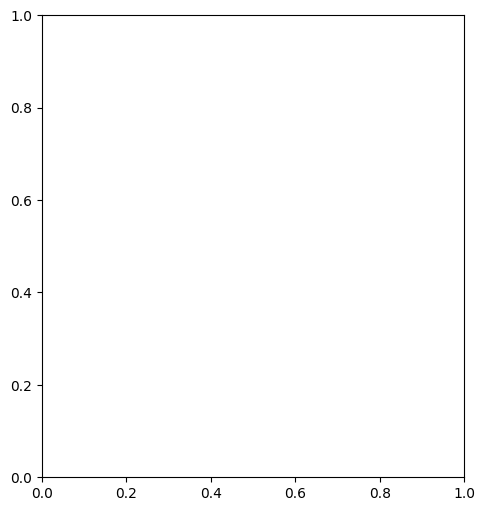

In [15]:
##Visualization:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation mean absolute error values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])

plt.show()


In [ ]:
# Save the model
model.save('trained_model_ChillerANN.h5')

# Load the model (if needed)
loaded_model = tf.keras.models.load_model('trained_model_ChillerANN.h5')


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
# plot_actual_vs_predicted(actuals_df, predictions_df, outputs)


In [ ]:
predictions = []

prediction = model.predict(X_test[0].reshape(1, -1))
predictions.append(prediction)
for row_idx in range(1, 100):
    
    prediction = model.predict(np.concatenate([X_test[row_idx][:4], prediction.reshape(-1, )]).reshape(1, -1))
    predictions.append(prediction)
    
    


1/1 [==============================] - 0s 31ms/step


In [16]:
predictions = np.array(predictions)

In [25]:

predictions_df = pd.DataFrame(scaler_y.inverse_transform(predictions.reshape(-1, 11)), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test[:100]), columns=outputs)

C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  cvrmse = (rmse / mean_actual) * 100
C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  cvrmse = (rmse / mean_actual) * 100
C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  cvrmse = (rmse / mean_actual) * 100
C:\Users\tanma\AppData\Local\Temp\ipykernel_55596\3050166784.py:20: RuntimeWarning: divide by zero e

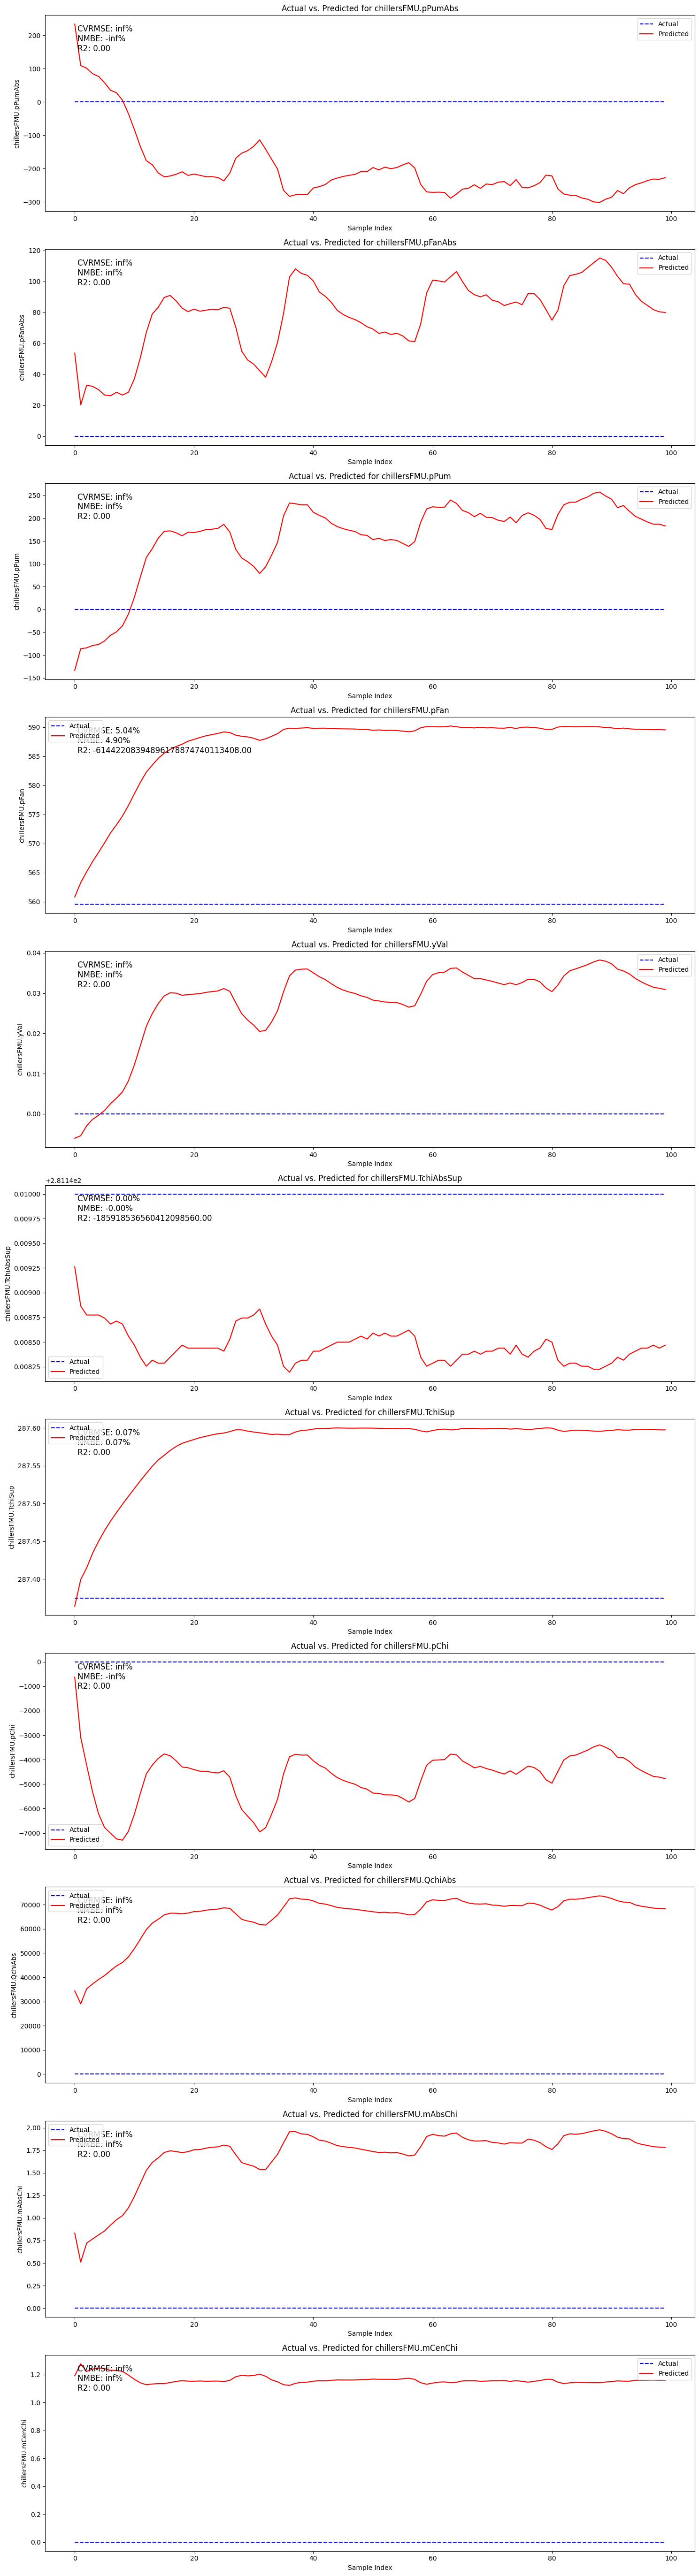

In [26]:

plot_actual_vs_predicted(actuals_df, predictions_df, outputs)